In [1]:
import pandas as pd
train = pd.read_csv('train1.csv')
print("Training Set:"% train.columns, train.shape, len(train))

Training Set: (100460, 2) 100460


In [2]:
test=pd.read_csv('test1.csv')
print("Test Set:"% test.columns, test.shape, len(test))

Test Set: (35815, 2) 35815


In [3]:
train

,Content,Label
0,esteban zambians again dear kylietastic thank ...,0
1,yes it is always best when whatever can do tha...,0
2,well thank you always happy to talk to fans i ...,0
3,capitalization of there is no consistency with...,0
4,and that has to do then whatever will appoint ...,0
...,...,...
100455,pizza time food thepizzacompany enjoy my food ...,0
100456,moment sgt bua isaac of military police making...,0
100457,selfie by david ha charleston vfw post,0
100458,do not on to what does not right or does not m...,0


In [4]:
test

,Content,Label
0,denial of normal the con be asked to comment o...,1
1,just by being able to tweet this insufferable ...,1
2,that is retarded you too cute to be single tha...,1
3,thought of a real badass mongol style declarat...,1
4,afro american basho,1
...,...,...
35810,i hate being an arabic man living in this coun...,0
35811,i despise seeing an arabic man living in my co...,1
35812,birds are so fucking boring i do not know why ...,0
35813,birds are so fucking boring i do not know why ...,1


In [5]:
import pandas as pd
import re

def clean_text(df, text_field):
    # Ensure all entries in the column are strings
    df[text_field] = df[text_field].astype(str).str.lower()
    # Apply regex to clean the text
    df[text_field] = df[text_field].apply(lambda elem: re.sub(r"(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)|^rt|http.+?", "", elem))
    return df


test_clean = clean_text(test, "Content")
train_clean = clean_text(train, "Content")


In [6]:
test_clean

,Content,Label
0,denial of normal the con be asked to comment o...,1
1,just by being able to tweet this insufferable ...,1
2,that is retarded you too cute to be single tha...,1
3,thought of a real badass mongol style declarat...,1
4,afro american basho,1
...,...,...
35810,i hate being an arabic man living in this coun...,0
35811,i despise seeing an arabic man living in my co...,1
35812,birds are so fucking boring i do not know why ...,0
35813,birds are so fucking boring i do not know why ...,1


In [7]:
train_clean

,Content,Label
0,esteban zambians again dear kylietastic thank ...,0
1,yes it is always best when whatever can do tha...,0
2,well thank you always happy to talk to fans i ...,0
3,capitalization of there is no consistency with...,0
4,and that has to do then whatever will appoint ...,0
...,...,...
100455,pizza time food thepizzacompany enjoy my food ...,0
100456,moment sgt bua isaac of military police making...,0
100457,selfie by david ha charleston vfw post,0
100458,do not on to what does not right or does not m...,0


In [8]:
import seaborn as sns
import matplotlib.pyplot as plt



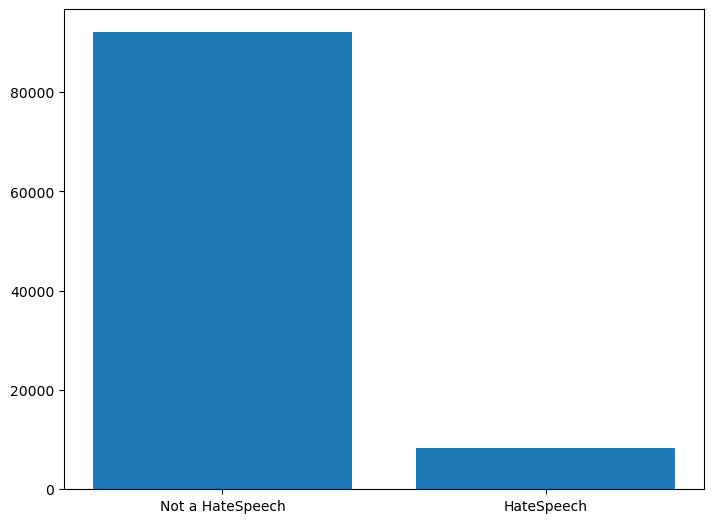

In [9]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
langs = ['Not a HateSpeech','HateSpeech']
data = [len(train_clean[train_clean.Label==0]),len(train_clean[train_clean.Label==1])]
ax.bar(langs,data)
plt.show()

In [13]:
from sklearn.utils import resample
train_majority = train_clean[train_clean.Label==0]
train_minority = train_clean[train_clean.Label==1]
train_minority_upsampled = resample(train_minority, 
                                 replace=True,    
                                 n_samples=len(train_majority),   
                                 random_state=123)
train_upsampled = pd.concat([train_minority_upsampled, train_majority])
train_upsampled['Label'].value_counts()

1    92063
0    92063
Name: Label, dtype: int64

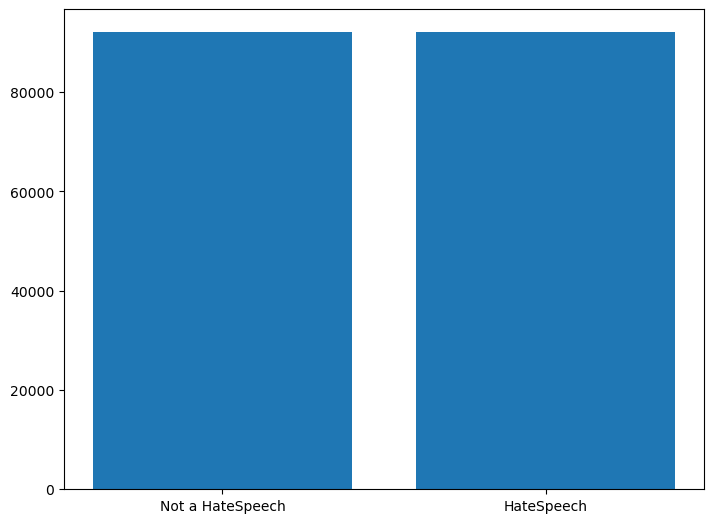

In [15]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
langs = ['Not a HateSpeech','HateSpeech']
data = [len(train_upsampled[train_upsampled.Label==0]),len(train_upsampled[train_upsampled.Label==1])]
ax.bar(langs,data)
plt.show()

In [16]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.linear_model import SGDClassifier
pipeline_sgd = Pipeline([
    ('vect', CountVectorizer()),
    ('tfidf',  TfidfTransformer()),
    ('nb', SGDClassifier()),])

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(train_upsampled['Content'],
                                                    train_upsampled['Label'],random_state = 0)

In [26]:
model = pipeline_sgd.fit(X_train, y_train)
y_predict = model.predict(X_test)
from sklearn.metrics import f1_score
res=f1_score(y_test, y_predict)
print(res)
if res<1:
    print("This Hash Tag has a positive influence")
else:
    print("This Hash Tag has a negative influence")

0.9136323658751099
This Hash Tag has a positive influence
